# IMDB Unidirectional/Bidirectional LSTM Sentiment Analysis

Unidrectional and bidirectional LSTMs are implemented to classify IMDB movie reviews by their sentiment. The model with Regularization can reduce the overfitting more effectively than drop out. 

#### Load Keras Layers, Sequential

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM, GlobalMaxPool1D
from keras.layers.wrappers import Bidirectional 
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

Using TensorFlow backend.


#### Hyperparameters

In [2]:
# output directory name:
output_dir = 'model_output/biLSTM'

# training:
epochs = 5
batch_size = 128

# word embedding: 
n_dim = 32 
n_unique_words = 20000 
max_review_length = 300 
pad_type = trunc_type = 'pre'
drop_embed = 0.3 

# LSTM layer dropout:
drop_lstm = 0.3

#### Load data and Padding

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) 

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (25000,)
y_train shape: (25000,)
x_valid shape: (25000,)
y_valid shape: (25000,)


In [4]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

#### Unidrectional LSTM Neural Network

In [5]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(64, dropout=drop_lstm))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 300, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 669,057
Trainable params: 669,057
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,     
              validation_data=(x_valid, y_valid))              

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 265s 11ms/step - loss: 0.4998 - acc: 0.7332 - val_loss: 0.2974 - val_acc: 0.8757
Epoch 2/5
25000/25000 [==============================] - 173s 7ms/step - loss: 0.2555 - acc: 0.8988 - val_loss: 0.3127 - val_acc: 0.8809
Epoch 3/5
25000/25000 [==============================] - 153s 6ms/step - loss: 0.1839 - acc: 0.9323 - val_loss: 0.3015 - val_acc: 0.8758
Epoch 4/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.1463 - acc: 0.9479 - val_loss: 0.3392 - val_acc: 0.8735
Epoch 5/5
25000/25000 [==============================] - 212s 8ms/step - loss: 0.1150 - acc: 0.9593 - val_loss: 0.3798 - val_acc: 0.8731


#### Evaluate

In [9]:
y_hat = model.predict_proba(x_valid)

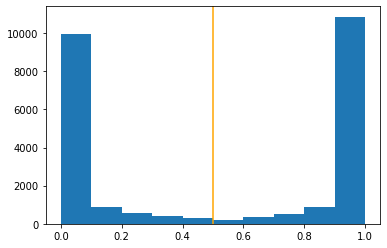

In [10]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [11]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'94.39'

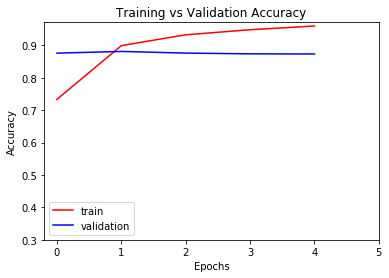

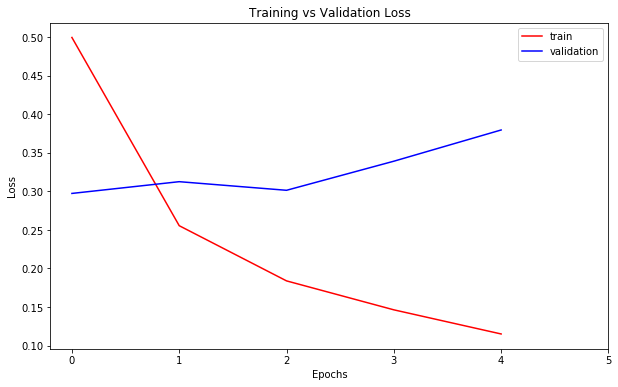

In [12]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

#### Bidrectional LSTM Neural Network 

In [13]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(64, dropout=drop_lstm)))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 32)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 300, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 697,985
Trainable params: 697,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,     
              validation_data=(x_valid, y_valid))
             

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 404s 16ms/step - loss: 0.4805 - acc: 0.7475 - val_loss: 0.3127 - val_acc: 0.8692
Epoch 2/5
25000/25000 [==============================] - 297s 12ms/step - loss: 0.2631 - acc: 0.8967 - val_loss: 0.2979 - val_acc: 0.8786
Epoch 3/5
25000/25000 [==============================] - 295s 12ms/step - loss: 0.1827 - acc: 0.9326 - val_loss: 0.3043 - val_acc: 0.8718
Epoch 4/5
25000/25000 [==============================] - 327s 13ms/step - loss: 0.1440 - acc: 0.9472 - val_loss: 0.3247 - val_acc: 0.8778
Epoch 5/5
25000/25000 [==============================] - 324s 13ms/step - loss: 0.1167 - acc: 0.9590 - val_loss: 0.3600 - val_acc: 0.8734


In [16]:
y_hat = model.predict_proba(x_valid)

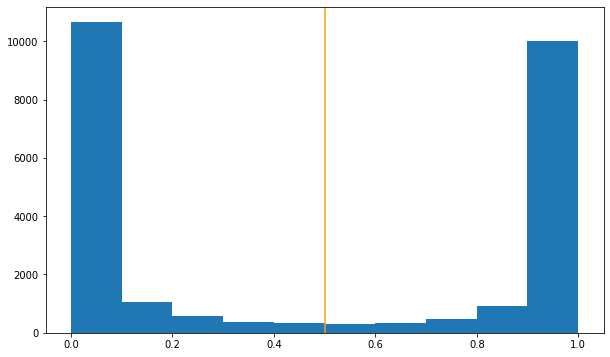

In [17]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [18]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'94.53'

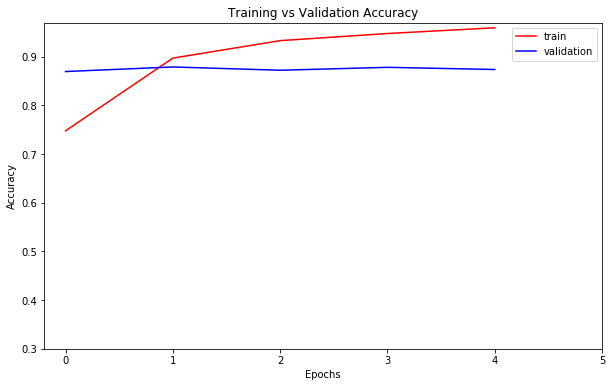

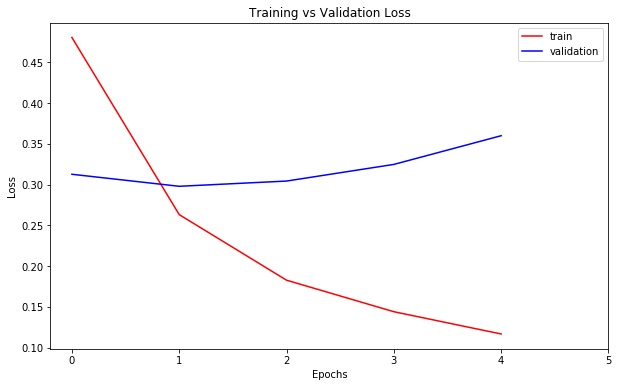

In [19]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

#### Unidirectional LSTM + Regularization

In [20]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(64, dropout=drop_lstm, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 32)           640000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 300, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 669,057
Trainable params: 669,057
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=6,
              verbose=1,     
              validation_data=(x_valid, y_valid))              

Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 165s 7ms/step - loss: 1.3850 - acc: 0.6492 - val_loss: 0.8158 - val_acc: 0.8510
Epoch 2/6
25000/25000 [==============================] - 155s 6ms/step - loss: 0.6990 - acc: 0.8721 - val_loss: 0.7137 - val_acc: 0.8430
Epoch 3/6
25000/25000 [==============================] - 152s 6ms/step - loss: 0.5018 - acc: 0.9142 - val_loss: 0.5468 - val_acc: 0.8706
Epoch 4/6
25000/25000 [==============================] - 156s 6ms/step - loss: 0.3815 - acc: 0.9346 - val_loss: 0.5263 - val_acc: 0.8637
Epoch 5/6
25000/25000 [==============================] - 152s 6ms/step - loss: 0.3064 - acc: 0.9461 - val_loss: 0.5149 - val_acc: 0.8564
Epoch 6/6
25000/25000 [==============================] - 162s 6ms/step - loss: 0.2582 - acc: 0.9502 - val_loss: 0.4654 - val_acc: 0.8660


In [23]:
y_hat = model.predict_proba(x_valid)

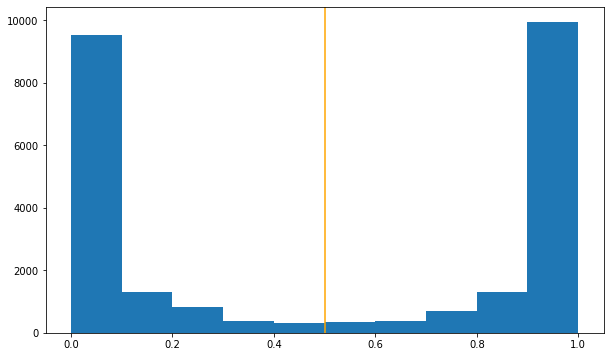

In [24]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [25]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'93.92'

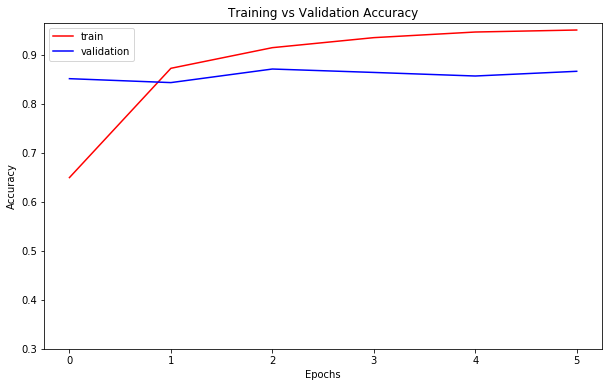

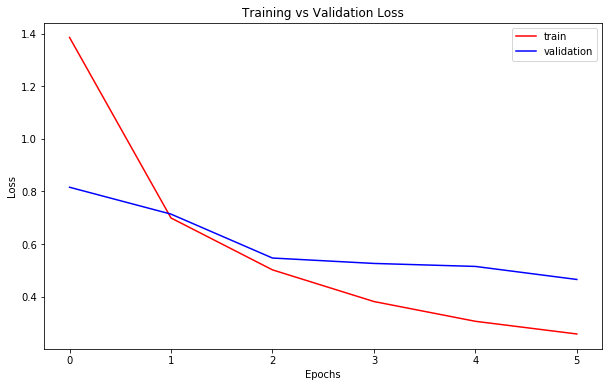

In [26]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

#### Bidirectional LSTM + Regularization

In [28]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(64, dropout=drop_lstm, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 32)           640000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 300, 32)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 697,985
Trainable params: 697,985
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=6,
              verbose=1,     
              validation_data=(x_valid, y_valid))        

Train on 25000 samples, validate on 25000 samples
Epoch 1/6
25000/25000 [==============================] - 308s 12ms/step - loss: 2.1422 - acc: 0.6650 - val_loss: 1.2308 - val_acc: 0.8559
Epoch 2/6
25000/25000 [==============================] - 308s 12ms/step - loss: 1.0330 - acc: 0.8791 - val_loss: 0.9185 - val_acc: 0.8628
Epoch 3/6
25000/25000 [==============================] - 298s 12ms/step - loss: 0.7248 - acc: 0.9118 - val_loss: 0.7224 - val_acc: 0.8674
Epoch 4/6
25000/25000 [==============================] - 300s 12ms/step - loss: 0.5098 - acc: 0.9355 - val_loss: 0.5970 - val_acc: 0.8711
Epoch 5/6
25000/25000 [==============================] - 297s 12ms/step - loss: 0.3790 - acc: 0.9460 - val_loss: 0.5412 - val_acc: 0.8545
Epoch 6/6
25000/25000 [==============================] - 314s 13ms/step - loss: 0.2937 - acc: 0.9529 - val_loss: 0.5208 - val_acc: 0.8645


In [31]:
y_hat = model.predict_proba(x_valid)

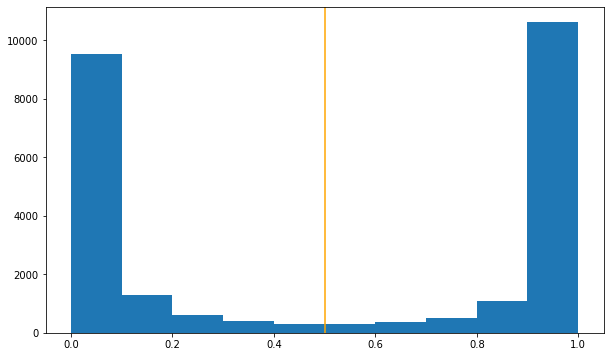

In [32]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [33]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'93.80'

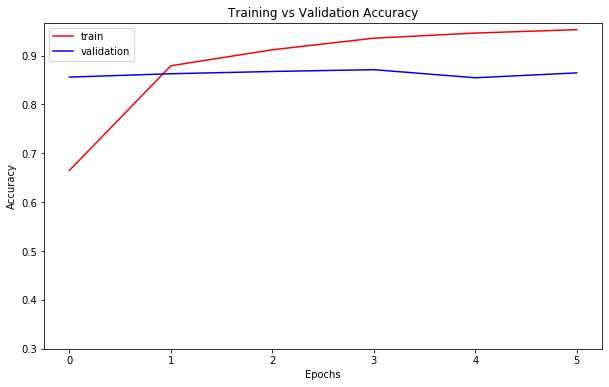

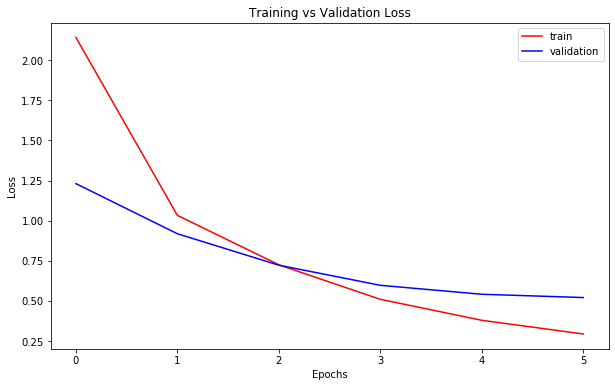

In [34]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()